In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
print(df.columns)



Index(['hour_beginning', 'location', 'Pedestrians', 'Towards Manhattan',
       'Towards Brooklyn', 'weather_summary', 'temperature', 'precipitation',
       'lat', 'long', 'events', 'Location1'],
      dtype='object')


<ipython-input-10-1fbfe109ad28>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


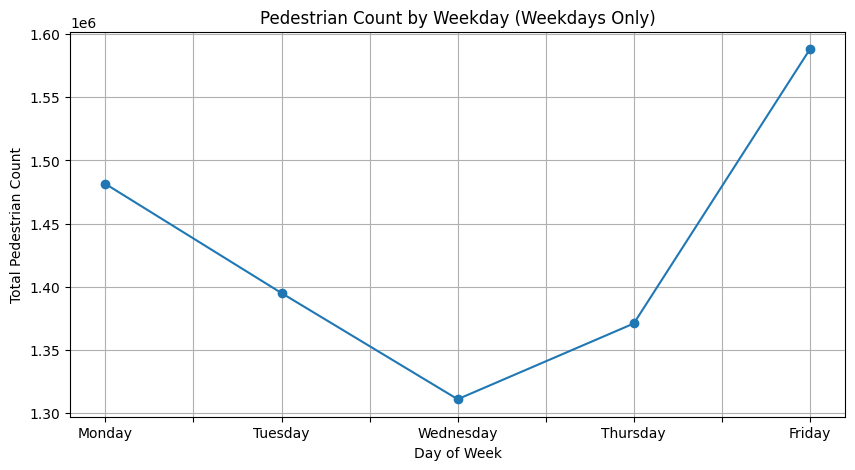

In [10]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

# Extract weekday name
df['DayOfWeek'] = df['hour_beginning'].dt.day_name()

# Filter only weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df[df['DayOfWeek'].isin(weekdays)]

# Group by weekday
weekday_counts = df_weekdays.groupby('DayOfWeek')['Pedestrians'].sum().reindex(weekdays)

# Plot
plt.figure(figsize=(10, 5))
weekday_counts.plot(kind='line', marker='o')
plt.title("Pedestrian Count by Weekday (Weekdays Only)")
plt.xlabel("Day of Week")
plt.ylabel("Total Pedestrian Count")
plt.grid(True)
plt.show()


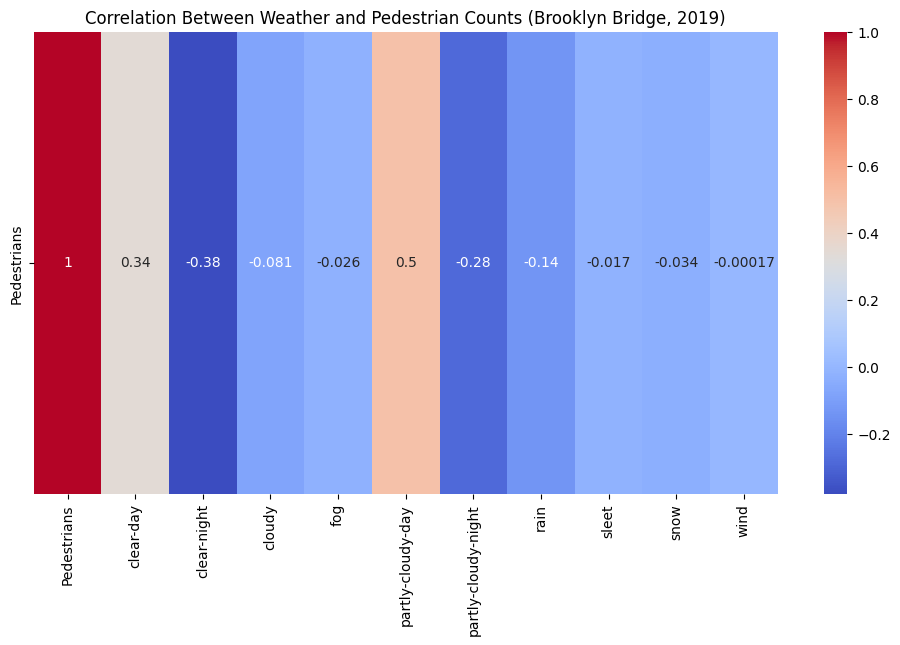

In [11]:
# Filter for 2019
df['year'] = df['hour_beginning'].dt.year
df_2019 = df[(df['location'] == 'Brooklyn Bridge') & (df['year'] == 2019)]

# One-hot encode weather
weather_encoded = pd.get_dummies(df_2019['weather_summary'])

# Combine with pedestrian data
df_encoded = pd.concat([df_2019[['Pedestrians']], weather_encoded], axis=1)

# Correlation matrix
corr_matrix = df_encoded.corr()

# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix[['Pedestrians']].T, annot=True, cmap='coolwarm')
plt.title("Correlation Between Weather and Pedestrian Counts (Brooklyn Bridge, 2019)")
plt.show()


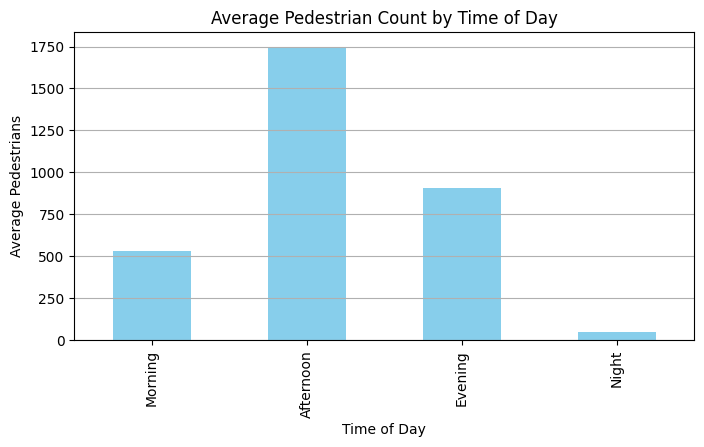

In [12]:
# Extract hour
df['hour'] = df['hour_beginning'].dt.hour

# Define time of day categories
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time of Day'] = df['hour'].apply(categorize_time)

# Average pedestrian count by time category
time_summary = df.groupby('Time of Day')['Pedestrians'].mean().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

# Plot
plt.figure(figsize=(8, 4))
time_summary.plot(kind='bar', color='skyblue')
plt.title("Average Pedestrian Count by Time of Day")
plt.ylabel("Average Pedestrians")
plt.xlabel("Time of Day")
plt.grid(axis='y')
plt.show()
